<a href="https://colab.research.google.com/github/smitapatil1/Textmining/blob/main/Text_Mining_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement

Perform sentimental analysis:

1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining
1. Import Libraries

In [2]:

import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

# 2. Multi-page web-scraping


In [6]:
import requests
from bs4 import BeautifulSoup

url = https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B5748CMQ  # Replace with your URL
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) '
                  'Chrome/102.0.0 Safari/537.36'
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')


Looping through multiple pages

In [7]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [8]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [9]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

# Save results to a Dataframe, then export as CSV

In [10]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nIta is an ok product....be...,3.0,The media could not be loaded.\n ...,Reviewed in India on 17 October 2022
1,4.0 out of 5 stars\nGood product daily ware able,4.0,The media could not be loaded.\n ...,Reviewed in India on 26 April 2023
2,4.0 out of 5 stars\nWorth the price!,4.0,The media could not be loaded.\n ...,Reviewed in India on 26 August 2022
3,4.0 out of 5 stars\nGood,4.0,The quality and features of the watch is good.,Reviewed in India on 17 June 2023
4,4.0 out of 5 stars\nGood product,4.0,Product is good. Once Battery charged watch wo...,Reviewed in India on 15 June 2023
5,4.0 out of 5 stars\nGood product,4.0,Good product..,Reviewed in India on 12 June 2023
6,"3.0 out of 5 stars\nMedicore watch, but could ...",3.0,"First look feel on 10th August : Good packing,...",Reviewed in India on 14 August 2022
7,4.0 out of 5 stars\nConcern about Sleeping sensor,4.0,Bluetooth Calling is Awesome btt sometimes its...,Reviewed in India on 18 May 2023
8,3.0 out of 5 stars\nGood product,3.0,"Overall it's a good product,Positives:-Amazing...",Reviewed in India on 25 August 2022
9,3.0 out of 5 stars\nGood but could have been b...,3.0,"Pros:1. Amoled Display is super, usable at ver...",Reviewed in India on 24 November 2022


In [11]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [12]:
df.head()


,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nIta is an ok product....be...,3.0,The media could not be loaded.\n ...,17 October 2022
1,4.0 out of 5 stars\nGood product daily ware able,4.0,The media could not be loaded.\n ...,26 April 2023
2,4.0 out of 5 stars\nWorth the price!,4.0,The media could not be loaded.\n ...,26 August 2022
3,4.0 out of 5 stars\nGood,4.0,The quality and features of the watch is good.,17 June 2023
4,4.0 out of 5 stars\nGood product,4.0,Product is good. Once Battery charged watch wo...,15 June 2023
5,4.0 out of 5 stars\nGood product,4.0,Good product..,12 June 2023
6,"3.0 out of 5 stars\nMedicore watch, but could ...",3.0,"First look feel on 10th August : Good packing,...",14 August 2022
7,4.0 out of 5 stars\nConcern about Sleeping sensor,4.0,Bluetooth Calling is Awesome btt sometimes its...,18 May 2023
8,3.0 out of 5 stars\nGood product,3.0,"Overall it's a good product,Positives:-Amazing...",25 August 2022
9,3.0 out of 5 stars\nGood but could have been b...,3.0,"Pros:1. Amoled Display is super, usable at ver...",24 November 2022


In [14]:
df.to_csv("BoatSmartWatch_Review.csv")


# 3. Load Dataset

In [15]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nIta is an ok product....be...,3.0,The media could not be loaded.\n ...,17 October 2022
1,4.0 out of 5 stars\nGood product daily ware able,4.0,The media could not be loaded.\n ...,26 April 2023
2,4.0 out of 5 stars\nWorth the price!,4.0,The media could not be loaded.\n ...,26 August 2022
3,4.0 out of 5 stars\nGood,4.0,The quality and features of the watch is good.,17 June 2023
4,4.0 out of 5 stars\nGood product,4.0,Product is good. Once Battery charged watch wo...,15 June 2023
5,4.0 out of 5 stars\nGood product,4.0,Good product..,12 June 2023
6,"3.0 out of 5 stars\nMedicore watch, but could ...",3.0,"First look feel on 10th August : Good packing,...",14 August 2022
7,4.0 out of 5 stars\nConcern about Sleeping sensor,4.0,Bluetooth Calling is Awesome btt sometimes its...,18 May 2023
8,3.0 out of 5 stars\nGood product,3.0,"Overall it's a good product,Positives:-Amazing...",25 August 2022
9,3.0 out of 5 stars\nGood but could have been b...,3.0,"Pros:1. Amoled Display is super, usable at ver...",24 November 2022


# 4. Data Exploration

In [16]:
reviews.Rating.describe()


count    10.000000
mean      3.600000
std       0.516398
min       3.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       4.000000
Name: Rating, dtype: float64

In [17]:
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        10 non-null     object 
 1   Rating       10 non-null     float64
 2   Review       10 non-null     object 
 3   Review_Date  10 non-null     object 
dtypes: float64(1), object(3)
memory usage: 448.0+ bytes


In [18]:
reviews.isna().sum()


Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

In [19]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nIta is an ok product....be...,3.0,The media could not be loaded.\n ...,17 October 2022
1,4.0 out of 5 stars\nGood product daily ware able,4.0,The media could not be loaded.\n ...,26 April 2023
2,4.0 out of 5 stars\nWorth the price!,4.0,The media could not be loaded.\n ...,26 August 2022
3,4.0 out of 5 stars\nGood,4.0,The quality and features of the watch is good.,17 June 2023
4,4.0 out of 5 stars\nGood product,4.0,Product is good. Once Battery charged watch wo...,15 June 2023


# 5. Data Visualization

Date vs Review Count


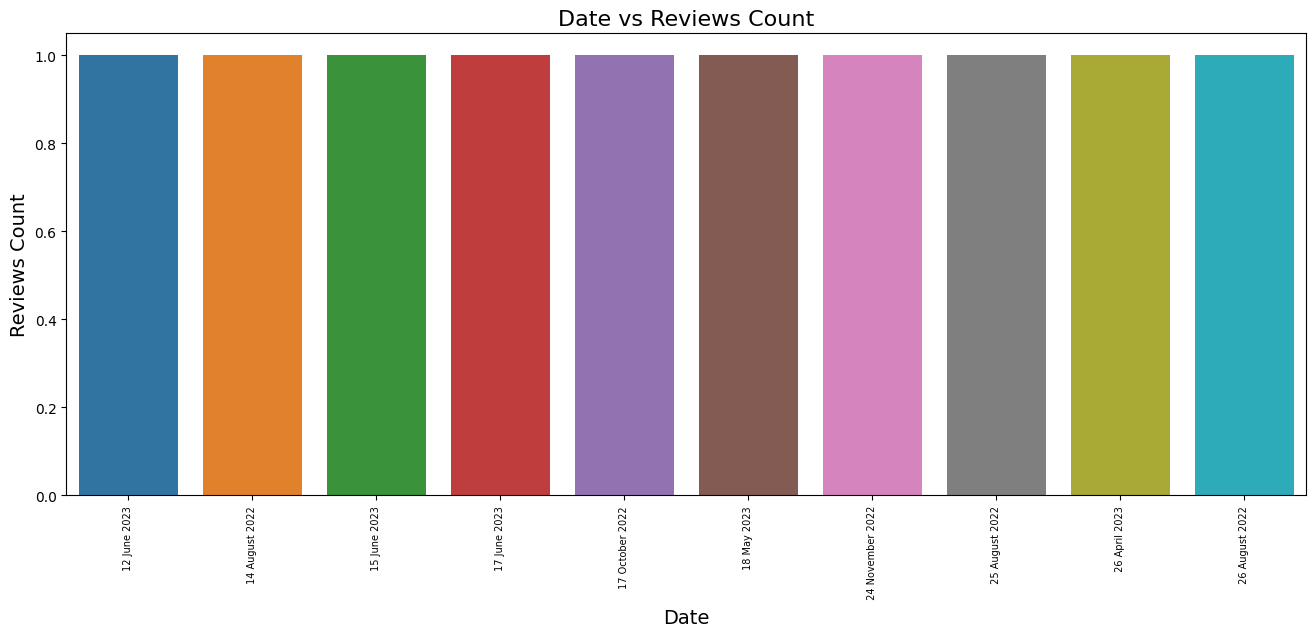

In [20]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

# Percentage of Ratings

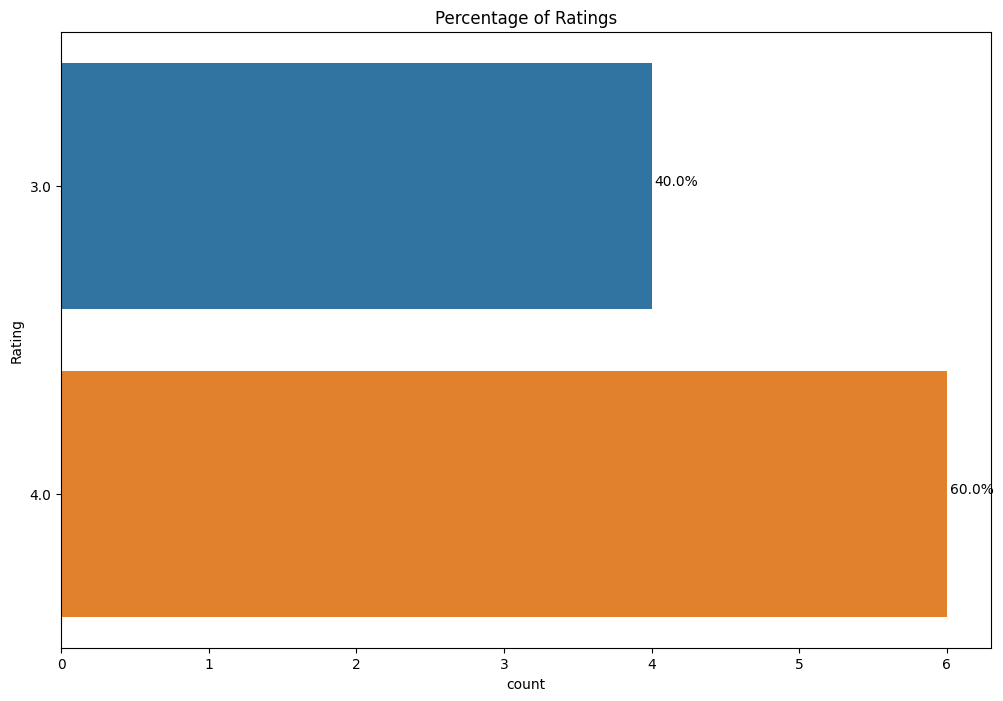

In [21]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

# 6. BasicText Preprocessing for Sentiment Analysis

Spelling Correction

In [22]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    The media could not be loaded.\n              ...
1    The media could not be loaded.\n              ...
2    The media could not be loaded.\n              ...
3       The quality and features of the watch is good.
4    Product is good. Once Battery charged watch wo...
Name: Review, dtype: object

In [23]:
boat_review = reviews[['Review']]
boat_review

,Review
0,The media could not be loaded.\n ...
1,The media could not be loaded.\n ...
2,The media could not be loaded.\n ...
3,The quality and features of the watch is good.
4,Product is good. Once Battery charged watch wo...
5,Good product..
6,"First look feel on 10th August : Good packing,..."
7,Bluetooth Calling is Awesome btt sometimes its...
8,"Overall it's a good product,Positives:-Amazing..."
9,"Pros:1. Amoled Display is super, usable at ver..."


Resetting index

In [24]:
boat_review.reset_index(drop=True, inplace=True)

In [29]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Assuming you have a DataFrame named 'boat_review' with a 'Review' column

# Load NLTK stopwords
stop = stopwords.words('english')

# Apply lowercase transformation and remove stopwords
boat_review['Review'] = boat_review['Review'].apply(
    lambda x: " ".join(word.lower() for word in word_tokenize(str(x)) if word.lower() not in stop)
)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Lemmatizer

In [36]:
import re
from tqdm import tqdm_notebook

# Assuming you have a DataFrame named 'boat_review' with a 'Review' column

corpus = []
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', ' ', boat_review['Review'][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    corpus.append(" ".join(cleaned))  # Append cleaned text to corpus list

# Create a DataFrame with cleaned and original reviews
dataframe = pd.DataFrame({"Clean_Reviews": corpus, "Uncleaned_Reviews": boat_review['Review']})

dataframe.head()


  0%|          | 0/10 [00:00<?, ?it/s]

,Clean_Reviews,Uncleaned_Reviews
0,media could loaded hello good day m fan boat d...,"media could loaded . hello good day , 'm fan b..."
1,media could loaded boat extend pro reviewshyam...,media could loaded . boat extend pro reviewshy...
2,media could loaded got watch today checked fea...,media could loaded . got watch today checked f...
3,quality features watch good,quality features watch good .
4,product good battery charged watch work one week,product good . battery charged watch work one ...


# 7. Text Pre-processing Techniques

A. Removing '@names'

In [37]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [38]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,media could loaded hello good day m fan boat d...,"media could loaded . hello good day , 'm fan b..."
1,media could loaded boat extend pro reviewshyam...,media could loaded . boat extend pro reviewshy...
2,media could loaded got watch today checked fea...,media could loaded . got watch today checked f...
3,quality features watch good,quality features watch good .
4,product good battery charged watch work one week,product good . battery charged watch work one ...
5,good product,good product ..
6,first look feel th august good packing feels p...,"first look feel 10th august : good packing , f..."
7,bluetooth calling awesome btt sometimes gets d...,bluetooth calling awesome btt sometimes gets d...
8,overall s good product positives amazing brigh...,"overall 's good product , positives : -amazing..."
9,pros amoled display super usable low low brigh...,"pros:1 . amoled display super , usable low low..."


B. Removing links (http | https)


In [39]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,media could loaded hello good day m fan boat d...,"media could loaded . hello good day , 'm fan b..."
1,media could loaded boat extend pro reviewshyam...,media could loaded . boat extend pro reviewshy...
2,media could loaded got watch today checked fea...,media could loaded . got watch today checked f...
3,quality features watch good,quality features watch good .
4,product good battery charged watch work one week,product good . battery charged watch work one ...
5,good product,good product ..
6,first look feel th august good packing feels p...,"first look feel 10th august : good packing , f..."
7,bluetooth calling awesome btt sometimes gets d...,bluetooth calling awesome btt sometimes gets d...
8,overall s good product positives amazing brigh...,"overall 's good product , positives : -amazing..."
9,pros amoled display super usable low low brigh...,"pros:1 . amoled display super , usable low low..."


C. Removing Review with empty text

In [40]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,media could loaded hello good day m fan boat d...,"media could loaded . hello good day , 'm fan b..."
1,media could loaded boat extend pro reviewshyam...,media could loaded . boat extend pro reviewshy...
2,media could loaded got watch today checked fea...,media could loaded . got watch today checked f...
3,quality features watch good,quality features watch good .
4,product good battery charged watch work one week,product good . battery charged watch work one ...
5,good product,good product ..
6,first look feel th august good packing feels p...,"first look feel 10th august : good packing , f..."
7,bluetooth calling awesome btt sometimes gets d...,bluetooth calling awesome btt sometimes gets d...
8,overall s good product positives amazing brigh...,"overall 's good product , positives : -amazing..."
9,pros amoled display super usable low low brigh...,"pros:1 . amoled display super , usable low low..."


D. Dropping duplicate rows

In [41]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,media could loaded hello good day m fan boat d...,"media could loaded . hello good day , 'm fan b..."
1,media could loaded boat extend pro reviewshyam...,media could loaded . boat extend pro reviewshy...
2,media could loaded got watch today checked fea...,media could loaded . got watch today checked f...
3,quality features watch good,quality features watch good .
4,product good battery charged watch work one week,product good . battery charged watch work one ...
5,good product,good product ..
6,first look feel th august good packing feels p...,"first look feel 10th august : good packing , f..."
7,bluetooth calling awesome btt sometimes gets d...,bluetooth calling awesome btt sometimes gets d...
8,overall s good product positives amazing brigh...,"overall 's good product , positives : -amazing..."
9,pros amoled display super usable low low brigh...,"pros:1 . amoled display super , usable low low..."


E. Function to remove emoji

In [42]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [44]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,media could loaded hello good day m fan boat d...,"media could loaded . hello good day , 'm fan b..."
1,media could loaded boat extend pro reviewshyam...,media could loaded . boat extend pro reviewshy...
2,media could loaded got watch today checked fea...,media could loaded . got watch today checked f...
3,quality features watch good,quality features watch good .
4,product good battery charged watch work one week,product good . battery charged watch work one ...
5,good product,good product ..
6,first look feel th august good packing feels p...,"first look feel 10th august : good packing , f..."
7,bluetooth calling awesome btt sometimes gets d...,bluetooth calling awesome btt sometimes gets d...
8,overall s good product positives amazing brigh...,"overall 's good product , positives : -amazing..."
9,pros amoled display super usable low low brigh...,"pros:1 . amoled display super , usable low low..."


F. Removing Stop words

In [ ]:
import codecs

# Replace 'full_path_to_stop.txt' with the actual absolute file path
file_path = '/path/to/stop.txt'

with codecs.open(file_path, "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])



In [ ]:
stop.split(" ")


G. Tokenize 'Clean_Reviews'

In [53]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['media', 'could', 'loaded', 'boat', 'extend', 'pro', 'reviewshyam', 'rajwrite', 'review', 'smartwatch', 'boat', 'extend', 'pro', 'ai', 'language', 'model', 'n', 't', 'physical', 'senses', 'interact', 'products', 'like', 'humans', 'however', 'based', 'information', 'available', 'provide', 'comprehensive', 'review', 'boat', 'extend', 'pro', 'smartwatch', 'the', 'boat', 'extend', 'pro', 'smartwatch', 'designed', 'provide', 'users', 'wide', 'range', 'features', 'including', 'fitness', 'tracking', 'message', 'call', 'alerts', 'music', 'control', 'watch', 'compatible', 'ios', 'android', 'devices', 'comes', 'inch', 'touch', 'display', 'resolution', 'x', 'pixels', 'one', 'key', 'features', 'boat', 'extend', 'pro', 'long', 'battery', 'life', 'last', 'days', 'single', 'charge', 'making', 'reliable', 'companion', 'fitness', 'enthusiasts', 'want', 'track', 'activities', 'without', 'worrying', 'frequent', 'charging', 'watch', 'also', 'comes', 'sports', 'modes', 'including', 'running', 'cy

In [54]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [media, could, loaded, hello, good, day, m, fa...
1    [media, could, loaded, boat, extend, pro, revi...
2    [media, could, loaded, got, watch, today, chec...
3                     [quality, features, watch, good]
4    [product, good, battery, charged, watch, work,...
5                                      [good, product]
6    [first, look, feel, th, august, good, packing,...
7    [bluetooth, calling, awesome, btt, sometimes, ...
8    [overall, s, good, product, positives, amazing...
9    [pros, amoled, display, super, usable, low, lo...
Name: Clean_Reviews, dtype: object

In [55]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,media could loaded hello good day m fan boat d...,"media could loaded . hello good day , 'm fan b...","[media, could, loaded, hello, good, day, m, fa..."
1,media could loaded boat extend pro reviewshyam...,media could loaded . boat extend pro reviewshy...,"[media, could, loaded, boat, extend, pro, revi..."
2,media could loaded got watch today checked fea...,media could loaded . got watch today checked f...,"[media, could, loaded, got, watch, today, chec..."
3,quality features watch good,quality features watch good .,"[quality, features, watch, good]"
4,product good battery charged watch work one week,product good . battery charged watch work one ...,"[product, good, battery, charged, watch, work,..."
5,good product,good product ..,"[good, product]"
6,first look feel th august good packing feels p...,"first look feel 10th august : good packing , f...","[first, look, feel, th, august, good, packing,..."
7,bluetooth calling awesome btt sometimes gets d...,bluetooth calling awesome btt sometimes gets d...,"[bluetooth, calling, awesome, btt, sometimes, ..."
8,overall s good product positives amazing brigh...,"overall 's good product , positives : -amazing...","[overall, s, good, product, positives, amazing..."
9,pros amoled display super usable low low brigh...,"pros:1 . amoled display super , usable low low...","[pros, amoled, display, super, usable, low, lo..."


H. Converting words to Stemmer

In [56]:
stemmer = SnowballStemmer("english")

In [57]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,media could load hello good day m fan boat dev...
1,media could load boat extend pro reviewshyam r...
2,media could load got watch today check featur ...
3,qualiti featur watch good
4,product good batteri charg watch work one week
5,good product
6,first look feel th august good pack feel premi...
7,bluetooth call awesom btt sometim get disconne...
8,overal s good product posit amaz bright sharp ...
9,pros amol display super usabl low low bright l...


I. Converting words to Lemma

In [59]:
import nltk
nltk.download('wordnet')
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package wordnet to /root/nltk_data...


,stemmed
0,medium could loaded hello good day m fan boat ...
1,medium could loaded boat extend pro reviewshya...
2,medium could loaded got watch today checked fe...
3,quality feature watch good
4,product good battery charged watch work one week
5,good product
6,first look feel th august good packing feel pr...
7,bluetooth calling awesome btt sometimes get di...
8,overall s good product positive amazing bright...
9,pro amoled display super usable low low bright...


# 8. Basic Feature Extaction

A. Applying bag of Words without N grams

In [60]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [63]:
print(cv.get_feature_names_out()[109:200])


['comprehensive' 'concl' 'conditions' 'cons' 'consider' 'contacts'
 'continuously' 'control' 'cooked' 'correct' 'could' 'count' 'counter'
 'crest' 'crown' 'crystal' 'current' 'custom' 'customer' 'customisation'
 'customise' 'cycles' 'cycling' 'data' 'day' 'days' 'deal' 'decided'
 'decrease' 'default' 'definitely' 'demerit' 'design' 'designed' 'details'
 'device' 'devices' 'dial' 'dialer' 'difficulties' 'difficulty'
 'disconnected' 'display' 'displaying' 'displayits' 'displayui' 'divert'
 'done' 'download' 'dp' 'drain' 'drops' 'echo' 'editing' 'effective'
 'either' 'else' 'enable' 'enabled' 'energy' 'enough' 'enthusiasts' 'even'
 'ever' 'every' 'excellent' 'except' 'expectations' 'extend' 'extended'
 'face' 'facebook' 'faces' 'fan' 'far' 'feature' 'features' 'feedback'
 'feel' 'feels' 'felt' 'find' 'fine' 'firmware' 'first' 'fit' 'fitness'
 'fixed' 'fixes' 'flash' 'flashlight']


In [65]:
print(cv.get_feature_names_out()[:100])


['able' 'about' 'accept' 'accepted' 'according' 'accuracy' 'accurate'
 'active' 'activities' 'activity' 'add' 'adding' 'addition' 'adjustments'
 'affordable' 'afternoon' 'afterwards' 'ahead' 'ai' 'alarm' 'alarms'
 'alerts' 'allows' 'also' 'always' 'amazing' 'amoled' 'android' 'annoying'
 'answer' 'anyone' 'aod' 'app' 'appbattery' 'appfind' 'apps' 'apt'
 'around' 'asap' 'assistant' 'attach' 'attached' 'attended' 'audible'
 'audio' 'august' 'auto' 'automatically' 'available' 'average' 'awesome'
 'back' 'background' 'backup' 'backupwith' 'bad' 'based' 'battery' 'best'
 'better' 'biggest' 'bluetooth' 'boat' 'both' 'bought' 'box' 'bpm' 'brand'
 'brands' 'bright' 'brightness' 'broken' 'bt' 'btt' 'bug' 'bugless'
 'build' 'button' 'buy' 'buying' 'ca' 'calculate' 'calculates'
 'calculator' 'call' 'callertune' 'calling' 'calls' 'callyou' 'camera'
 'cant' 'capabilities' 'case' 'change' 'charge' 'charged' 'charging'
 'checked' 'choice' 'clear']


In [67]:
print(tweetscv.toarray()[100:200])


[]


B. CountVectorizer with N-grams (Bigrams & Trigrams)

In [68]:
dataframe = dataframe.reset_index(drop=True)


In [69]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10 [00:00<?, ?it/s]

In [70]:
corpus[3]


'qualiti featur watch good'

Applying Countvectorizer (Creating the Bag of Words model)


In [71]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [72]:
X.shape


(10, 1546)

In [75]:
print(cv.get_feature_names_out()[:20])


['abl' 'accept' 'accur' 'accuraci' 'activ' 'alarm' 'also' 'also includ'
 'alway' 'alway display' 'amol' 'amol display' 'android' 'annoy' 'anyon'
 'anyon look' 'app' 'app use' 'assist' 'attach']


In [76]:
cv.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [79]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df



,abl,accept,accur,accuraci,activ,alarm,also,also includ,alway,alway display,...,worth price thing,worth rang,worth rang get,would,would better,would better optionnotif,would say,would say buy,xtend,xtend pro
0,1,0,0,0,0,0,3,0,3,2,...,0,0,0,1,1,1,0,0,0,0
1,0,0,0,0,2,0,4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,2,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,2,3,0,3,1,0,0,0,0,...,0,1,1,1,0,0,1,1,0,0


C. TF-IDF Vectorizer


In [80]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10 [00:00<?, ?it/s]

In [81]:
corpus[4]


'product good batteri charg watch work one week'

Applying TF-IDF Vectorizer



In [82]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [83]:
X.shape


(10, 1546)

In [85]:
print(tfidf_v.get_feature_names_out()[:20])


['abl' 'accept' 'accur' 'accuraci' 'activ' 'alarm' 'also' 'also includ'
 'alway' 'alway display' 'amol' 'amol display' 'android' 'annoy' 'anyon'
 'anyon look' 'app' 'app use' 'assist' 'attach']


In [86]:
tfidf_v.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

11. Story Generation and Visualization


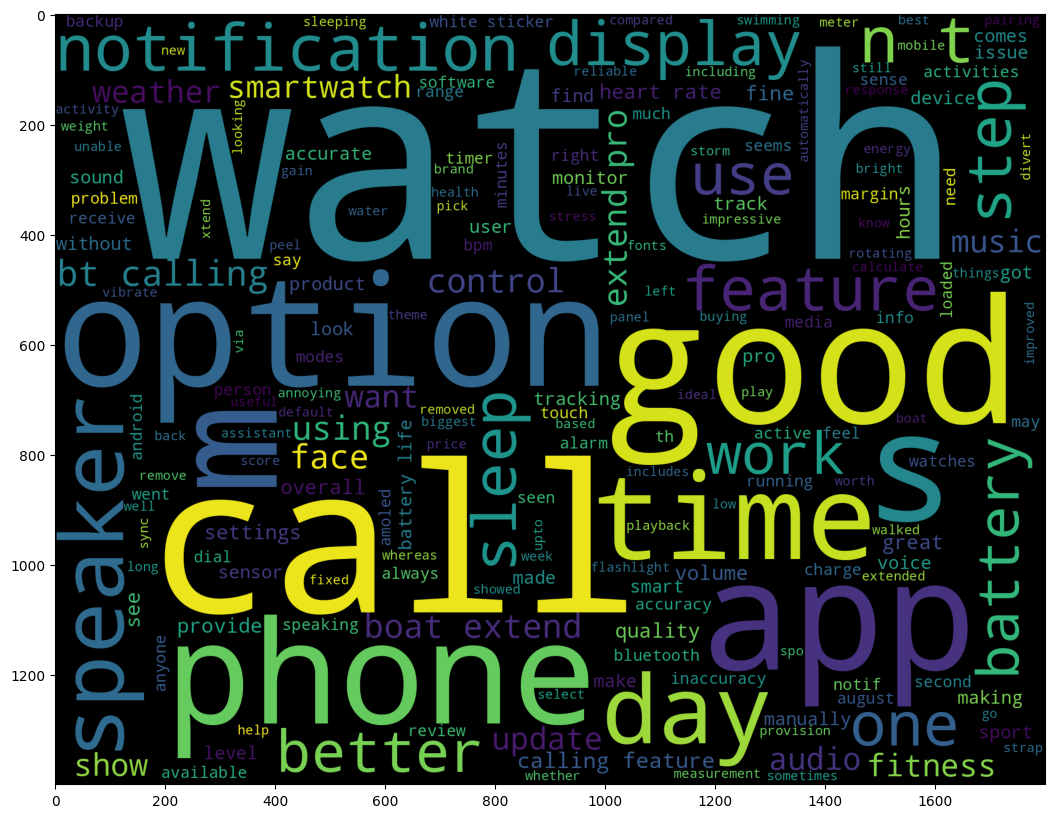

In [88]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);